In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("covid_19_clean_complete.csv",parse_dates=['Date'])

In [3]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [4]:
df.shape

(19836, 8)

In [5]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [6]:
# details of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19836 entries, 0 to 19835
Data columns (total 8 columns):
Province/State    6080 non-null object
Country/Region    19836 non-null object
Lat               19836 non-null float64
Long              19836 non-null float64
Date              19836 non-null datetime64[ns]
Confirmed         19836 non-null int64
Deaths            19836 non-null int64
Recovered         19836 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1.2+ MB


In [7]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000
mean,21.456103,22.498687,880.324662,40.387225,225.932799
std,24.785712,70.688066,8331.133731,492.369584,2645.682524
min,-51.796300,-135.000000,0.000000,0.000000,0.000000
25%,7.000000,-19.020800,0.000000,0.000000,0.000000
50%,23.685000,20.902977,1.000000,0.000000,0.000000
75%,41.204400,81.000000,62.000000,0.000000,2.000000
max,71.706900,178.065000,366614.000000,16523.000000,64014.000000


In [8]:
df.describe(include='object')

,Province/State,Country/Region
count,6080,19836
unique,80,184
top,Saskatchewan,China
freq,76,2508


We can see here that there are 80 unique state and 184 unique countries


In [9]:
# We will find out start date and last date from the available data

a=df.Date.value_counts().sort_index()
print('The first date is :', a.index[0])
print('The last date is:',a.index[-1])

The first date is : 2020-01-22 00:00:00
The last date is: 2020-04-06 00:00:00


In [10]:
# lets check the num values
df.isnull().sum()

Province/State    13756
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [11]:
## Rename the columns--chngethe name format
df.rename(columns={'Date':'date',
                  'Province/State':'state',
                  'Country/Region':'country',
                  'Lat':'lat',
                  'Long':'long',
                  'Confirmed':'confirmed',
                  'Deaths':'deaths',
                  'Recovered':'recovered'}
                   , inplace= True)
                  

In [12]:
# lets find active cases
#Active cases = confirmed - deaths -recovered
df['active']=df['confirmed']-df['deaths']-df['recovered']

In [13]:
df.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0


In [14]:
## Visualize the data  using seaborn
# We will see confirmed cases over the time 
#lets plot the graph

[Text(0, 0.5, 'Total cases'), Text(0.5, 0, 'Dates')]

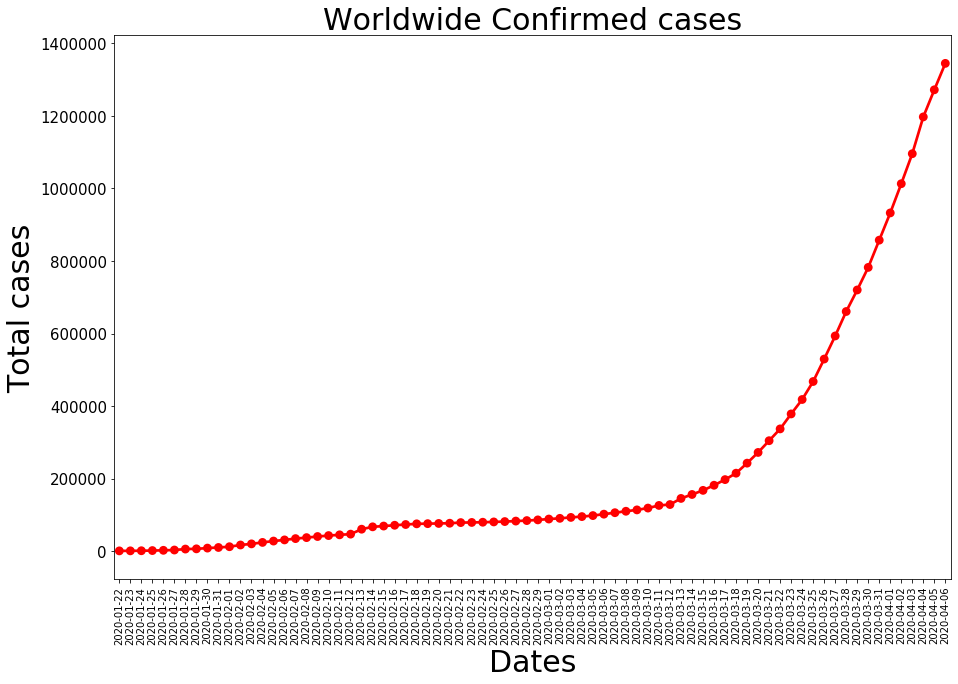

In [15]:
plt.figure(figsize= (15,10))
plt.xticks(rotation=90, fontsize =10)
plt.yticks(fontsize=15)
plt.xlabel("Dates", fontsize=30)
plt.ylabel("Total Cases", fontsize=30)
plt.title("Worldwide Confirmed cases", fontsize=30)
total_cases=df.groupby('date')['date', 'confirmed'].sum().reset_index()
total_cases['date']=pd.to_datetime(total_cases['date'])

ax=sns.pointplot(x= total_cases.date.dt.date, y=total_cases.confirmed, color='r')
ax.set(xlabel='Dates', ylabel='Total cases')

In [16]:
# lets find top 20 countries having most of the confirmed cases
top=df[df['date'] == df['date'].max()]
top_casualities=top.groupby(by='country')['confirmed'].sum().sort_values(ascending=False).head(20).reset_index()
top_casualities

,country,confirmed
0,US,366614
1,Spain,136675
2,Italy,132547
3,Germany,103374
4,France,98963
5,China,82665
6,Iran,60500
7,United Kingdom,52279
8,Turkey,30217
9,Switzerland,21657


In [17]:
# lets find active cases
#Active cases = confirmed - deaths -recovered
df['active']=df['confirmed']-df['deaths']-df['recovered']


In [18]:
df.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

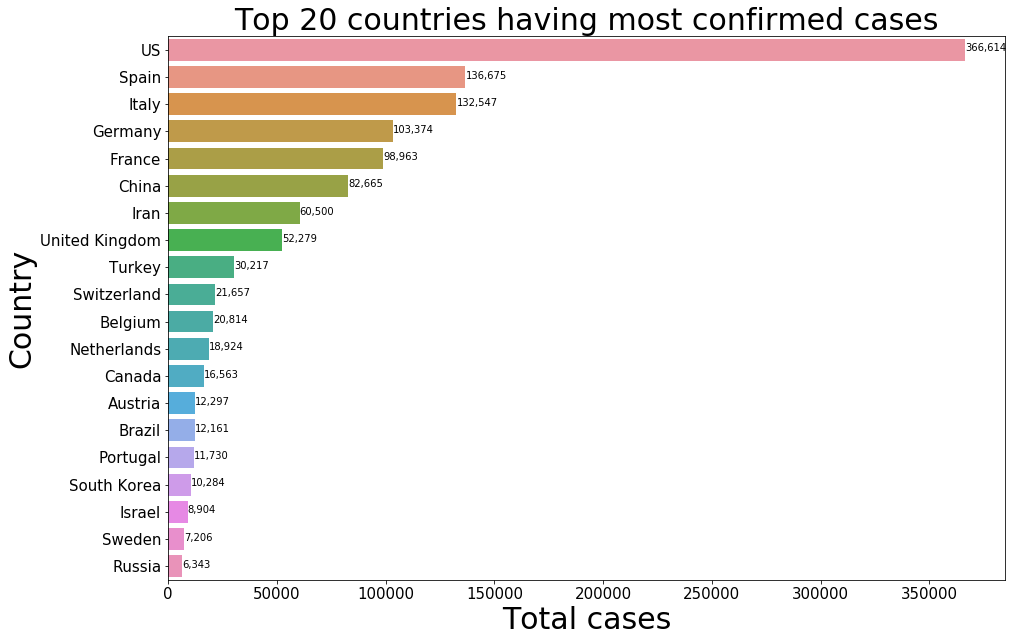

In [19]:
# lets plot the graph for casulaities
        
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most confirmed cases" , fontsize = 30)
ax = sns.barplot(x = top_casualities.confirmed, y = top_casualities.country)
for i, (value, name) in enumerate(zip(top_casualities.confirmed,top_casualities.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Country')

In [20]:
## Active cases around the world
top= df[df['date'] ==df['date'].max()]
world =top.groupby('country')['confirmed','active','deaths'].sum().reset_index()
world.head()

,country,confirmed,active,deaths
0,Afghanistan,367,338,11
1,Albania,377,240,21
2,Algeria,1423,1160,173
3,Andorra,525,473,21
4,Angola,16,12,2


In [21]:
#lets find top 20 countries having most active cases

In [22]:
top_active=top.groupby(by='country')['active'].sum().sort_values(ascending=False).head(20).reset_index()
top_active

,country,active
0,US,336250
1,Italy,93187
2,Spain,82897
3,Germany,72864
4,France,72609
5,United Kingdom,46607
6,Iran,32525
7,Turkey,28242
8,Netherlands,16792
9,Canada,16224


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

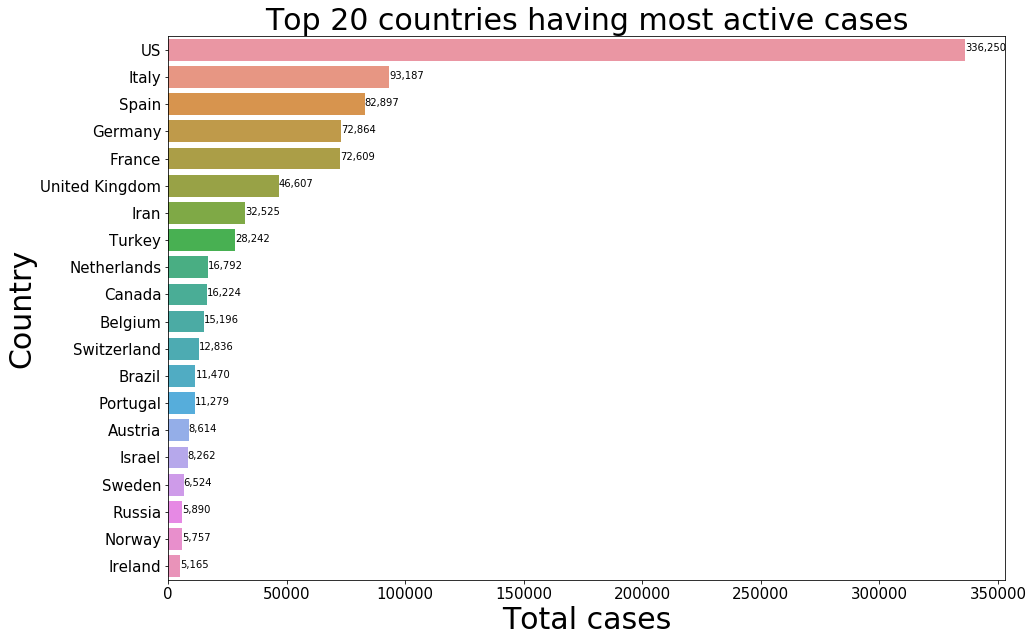

In [23]:
## lets plot the graph now for top counries on active cases 
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most active cases" , fontsize = 30)
ax = sns.barplot(x = top_active.active, y = top_active.country)
for i, (value, name) in enumerate(zip(top_active.active, top_active.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Country')

In [24]:
## observations:
Us is leading in active cases followed by italy, spain, Germany and france
there is drastic decrease in no of active cases in China 


SyntaxError: invalid syntax (<ipython-input-24-d10162d534a2>, line 2)

In [26]:
# Top 20 countries having most Deaths
top_deaths = top.groupby(by='country')['deaths'].sum().sort_values(ascending=False).head(20).reset_index()
top_deaths

,country,deaths
0,Italy,16523
1,Spain,13341
2,US,10783
3,France,8926
4,United Kingdom,5385
5,Iran,3739
6,China,3335
7,Netherlands,1874
8,Germany,1810
9,Belgium,1632


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

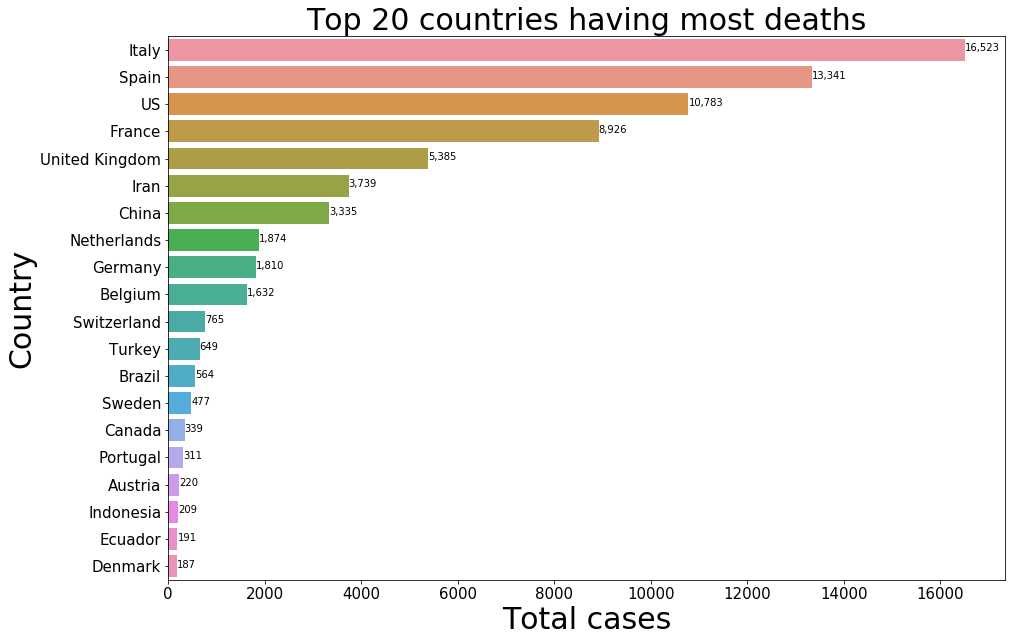

In [32]:
#lets plot the graph
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most deaths" , fontsize = 30)
ax = sns.barplot(x = top_deaths.deaths, y = top_deaths.country)
for i, (value, name) in enumerate(zip(top_deaths.deaths,top_deaths.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Country')
    


In [33]:
# Top 20 countries having most recovered cases
top_recovered=top.groupby(by= 'country')['recovered'].sum().sort_values(ascending=False).head(20).reset_index()
top_recovered


,country,recovered
0,China,77310
1,Spain,40437
2,Germany,28700
3,Iran,24236
4,Italy,22837
5,US,19581
6,France,17428
7,Switzerland,8056
8,South Korea,6598
9,Belgium,3986


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

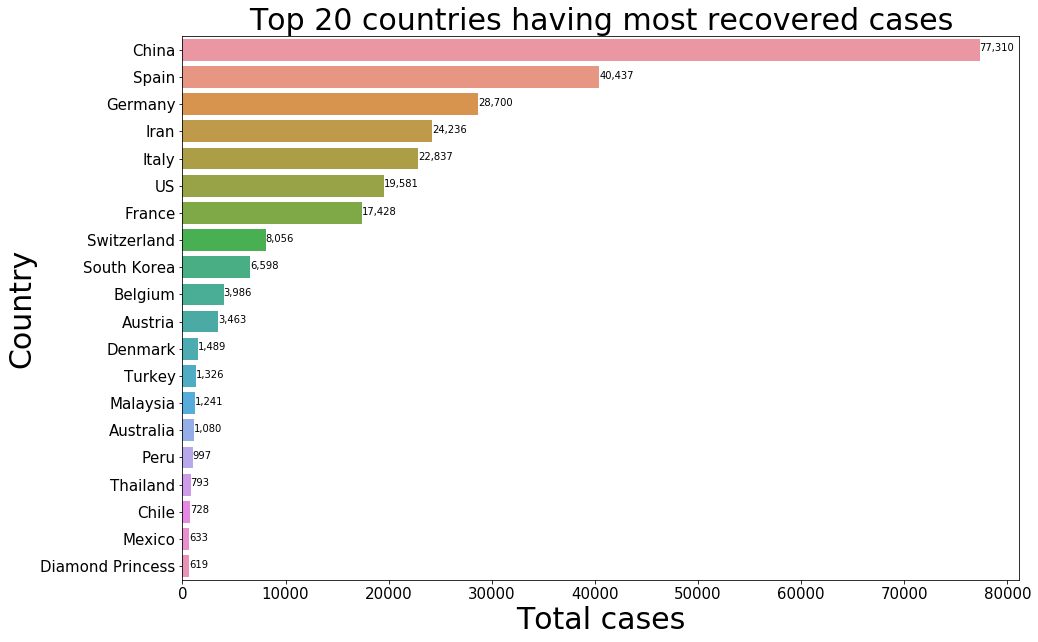

In [34]:
#lets plot the graph

plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most recovered cases" , fontsize = 30)
ax = sns.barplot(x = top_recovered.recovered, y = top_recovered.country)
for i, (value, name) in enumerate(zip(top_recovered.recovered,top_recovered.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Country')


In [35]:
# TOp 20 countries having the worst mortality and best mortality rate:
rate=top.groupby(by= 'country')['recovered','confirmed','deaths'].sum().reset_index()
rate['recovery percentage'] = round(((rate['recovered'])/(rate['confirmed']))*100,2)
rate['death percentage']= round(((rate['deaths'])/(rate['confirmed']))*100,2)
rate.head()

,country,recovered,confirmed,deaths,recovery percentage,death percentage
0,Afghanistan,18,367,11,4.90,3.00
1,Albania,116,377,21,30.77,5.57
2,Algeria,90,1423,173,6.32,12.16
3,Andorra,31,525,21,5.90,4.00
4,Angola,2,16,2,12.50,12.50


In [36]:
# mortality rate
mortality=rate.groupby(by= 'country')['death percentage'].sum().sort_values(ascending= False).head(20).reset_index()
mortality

,country,death percentage
0,Gambia,25.00
1,MS Zaandam,22.22
2,Liberia,21.43
3,Bahamas,17.24
4,Nicaragua,16.67
5,Sudan,16.67
6,Botswana,16.67
7,Mauritania,16.67
8,Belize,14.29
9,Cabo Verde,14.29


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Mortality Rate in percentage')]

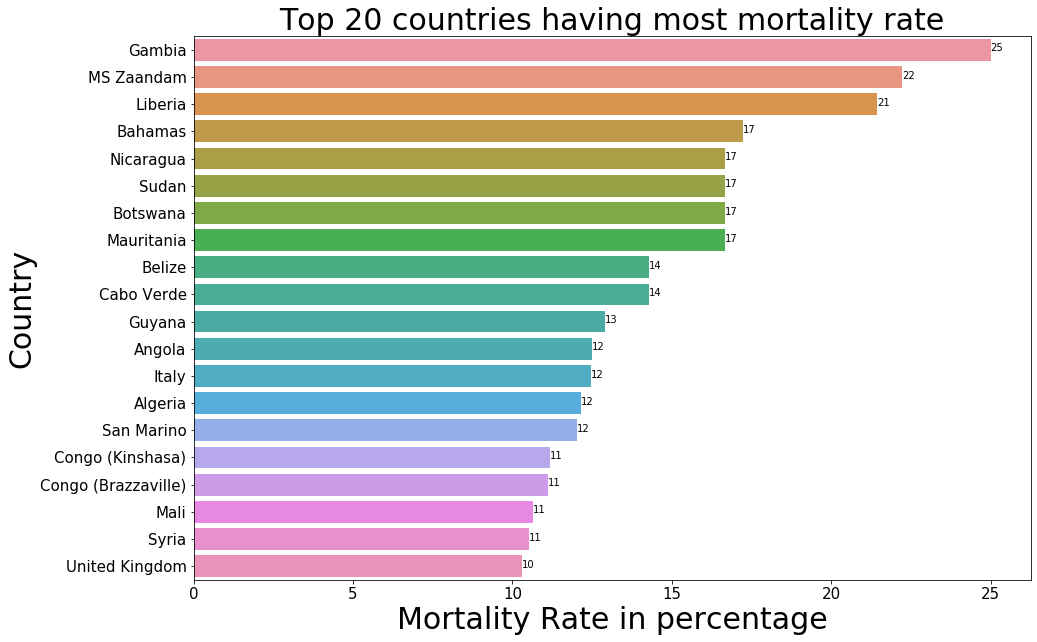

In [37]:
# lets plot the graph

plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most mortality rate" , fontsize = 30)
ax = sns.barplot(x = mortality['death percentage'], y = mortality.country)
for i, (value, name) in enumerate(zip(mortality['death percentage'], mortality.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Mortality Rate in percentage', ylabel='Country')


In [38]:
#recovery rate
recovery=rate.groupby(by='country')['recovery percentage'].sum().sort_values(ascending=False).head(20).reset_index()
recovery

,country,recovery percentage
0,China,93.52
1,Diamond Princess,86.94
2,Liechtenstein,71.43
3,Maldives,68.42
4,South Korea,64.16
5,Brunei,60.74
6,Bahrain,60.58
7,Gambia,50.00
8,Cambodia,46.49
9,Senegal,40.71


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Recovery Rate in percentage')]

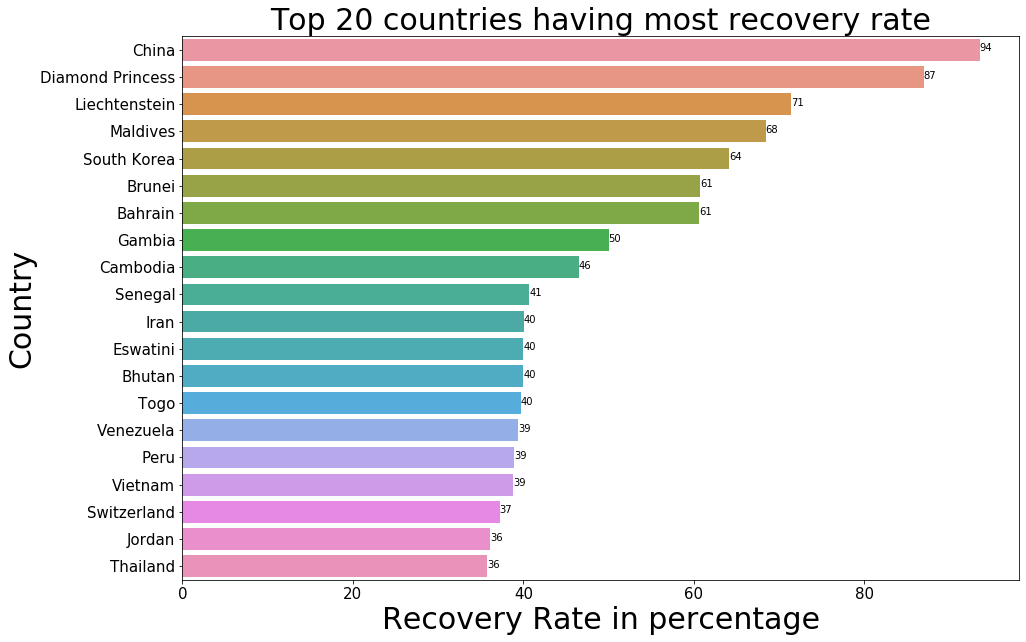

In [39]:
#lets plot the graph
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most recovery rate" , fontsize = 30)
ax = sns.barplot(x = recovery['recovery percentage'], y = recovery.country)
for i, (value, name) in enumerate(zip(recovery['recovery percentage'], recovery.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Recovery Rate in percentage', ylabel='Country')


In [ ]:
# Lets Analyze most affected countries of the world ( China, Usa, Italy)

In [41]:
# Analysis on china (china data)
china=df[df.country=='China']
china=china.groupby(by ='date')['recovered','deaths', 'confirmed','active'].sum().reset_index()
china.head()

,date,recovered,deaths,confirmed,active
0,2020-01-22,28,17,548,503
1,2020-01-23,30,18,643,595
2,2020-01-24,36,26,920,858
3,2020-01-25,39,42,1406,1325
4,2020-01-26,49,56,2075,1970


In [42]:
# analysis on USA data ( In usa forst cases was reported on 24th feb 2020)
us=df[df.country=='US']
us=us.groupby(by='date')['recovered','deaths', 'confirmed','active'].sum().reset_index()
us=us.iloc[33:].reset_index().drop('index', axis=1)
us.head()


,date,recovered,deaths,confirmed,active
0,2020-02-24,5,0,51,46
1,2020-02-25,6,0,51,45
2,2020-02-26,6,0,57,51
3,2020-02-27,6,0,58,52
4,2020-02-28,7,0,60,53


In [43]:
# Analysis on Italy data ( first case in Italy was reportedon 31st Jan)
#so lets consider required change in the dataset
italy=df[df.country=='Italy']
italy=italy.groupby(by='date')['recovered','deaths', 'confirmed','active'].sum().reset_index()
italy=italy.iloc[9:].reset_index().drop('index', axis=1)
italy.head()

,date,recovered,deaths,confirmed,active
0,2020-01-31,0,0,2,2
1,2020-02-01,0,0,2,2
2,2020-02-02,0,0,2,2
3,2020-02-03,0,0,2,2
4,2020-02-04,0,0,2,2


Text(0.5, 0, 'No. of days')

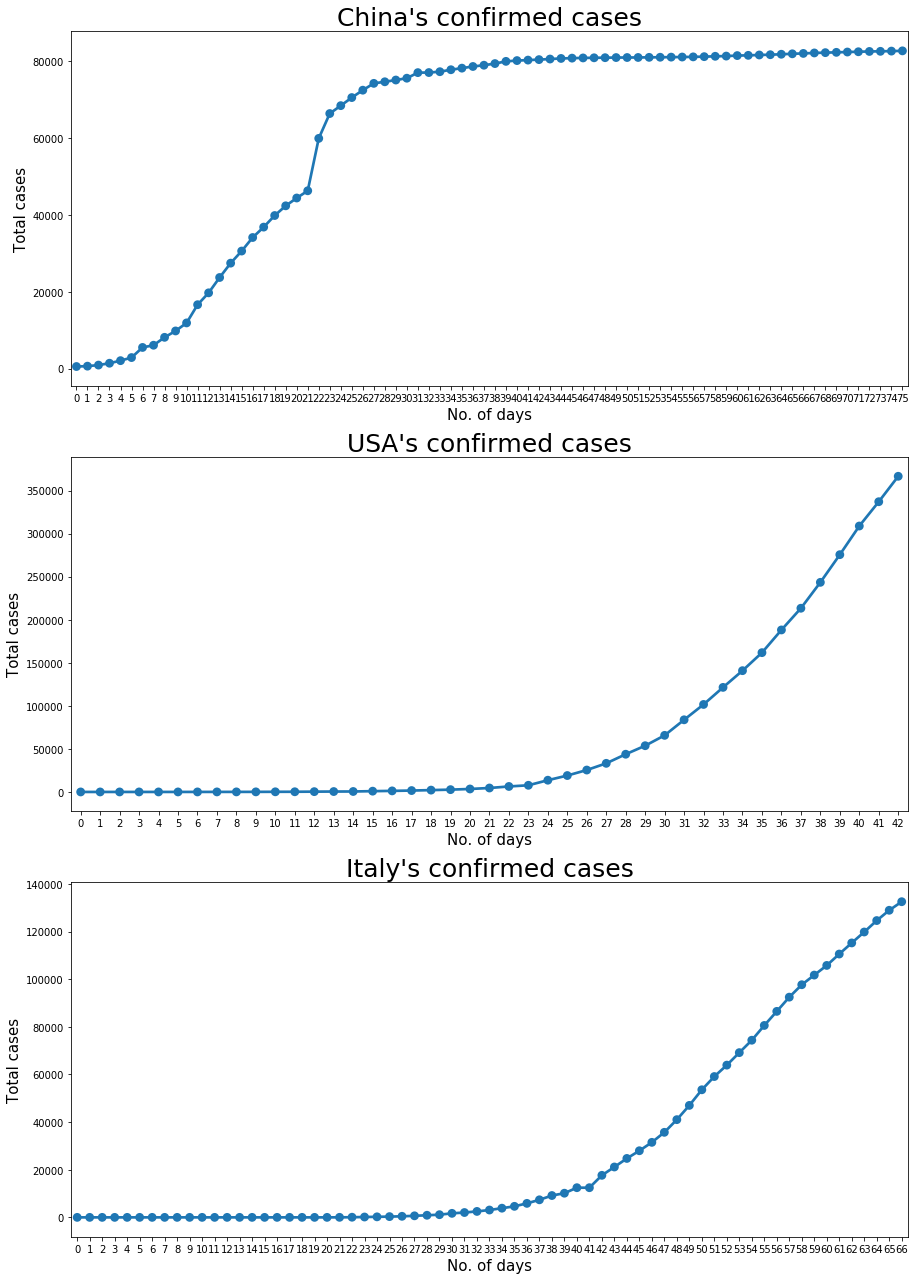

In [44]:
## Let's do the comaprison of the confirmed cases on these country (China, USA, Italy) till date:
plt.figure(figsize=(15,30))
a=plt.subplot(4,1,1)
sns.pointplot(china.index, china.confirmed)
plt.title("China's confirmed cases" , fontsize= 25)
plt.ylabel('Total cases', fontsize=15)
plt.xlabel('No. of days', fontsize=15)

plt.subplot(4,1,2)
sns.pointplot(us.index, us.confirmed)
plt.title("USA's confirmed cases" , fontsize= 25)
plt.ylabel('Total cases', fontsize=15)
plt.xlabel('No. of days', fontsize=15)


plt.subplot(4,1,3)
sns.pointplot(italy.index, italy.confirmed)
plt.title("Italy's confirmed cases" , fontsize= 25)
plt.ylabel('Total cases', fontsize=15)
plt.xlabel('No. of days', fontsize=15)


Text(0.5, 1.0, "Italy's Deaths Cases Over Time")

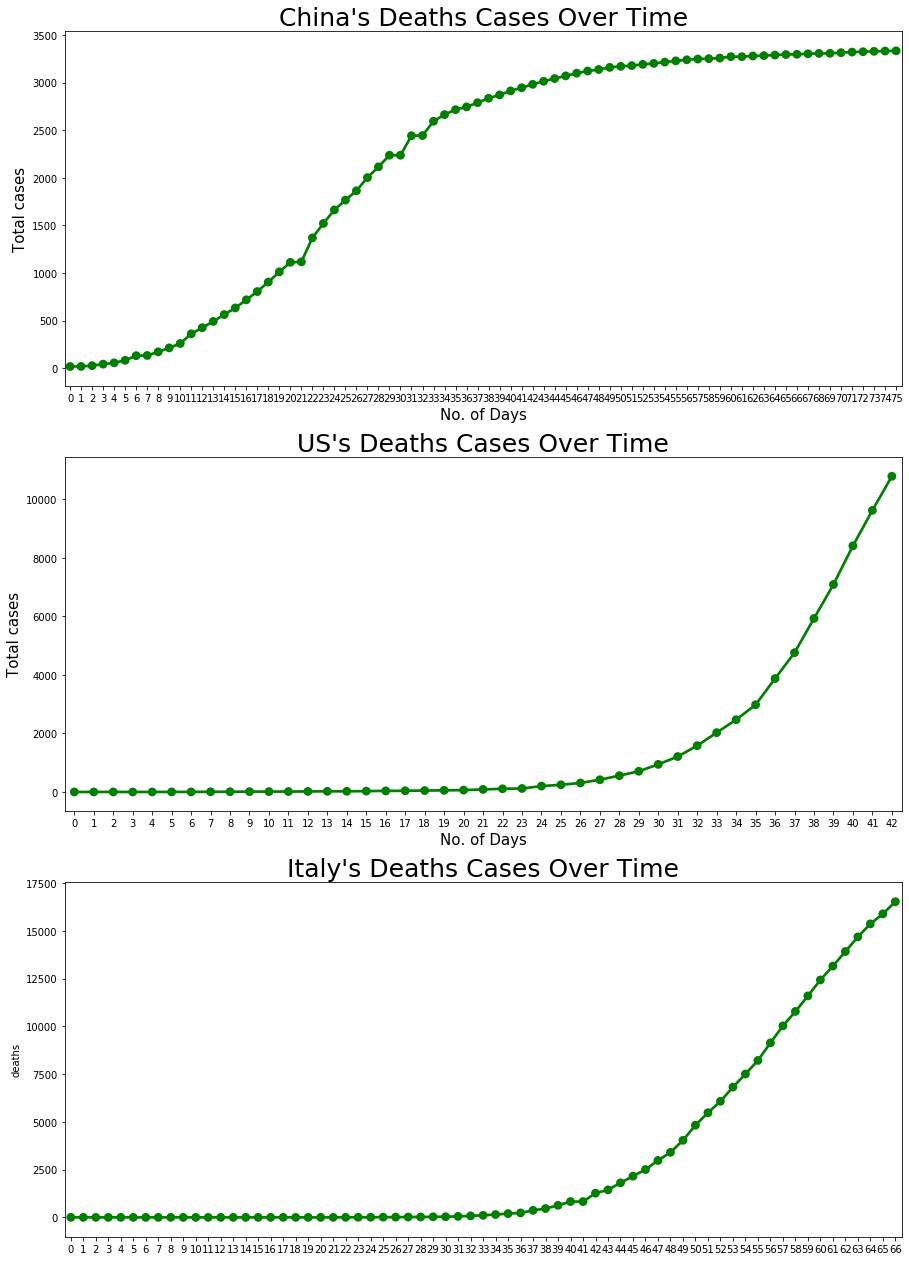

In [45]:
## Comparision on no of death cases till date.

plt.figure(figsize=(15,30))
plt.subplot(4, 1, 1)
sns.pointplot(china.index ,china.deaths, color = 'g')
plt.title("China's Deaths Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 2)
sns.pointplot(us.index ,us.deaths, color = 'g')
plt.title("US's Deaths Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 3)
sns.pointplot(italy.index ,italy.deaths, color = 'g')
plt.title("Italy's Deaths Cases Over Time" , fontsize = 25)
